# Augment images for racecar training
<br>
We can use the functions to:
<ol>
    <li> Flip images
    <li> Adjust lighting
    <li> Vary target variable 
</ol>

In [111]:
#Imports 
import os
import cv2
import glob
import random
import numpy as np
import matplotlib.pyplot as plt

from PIL import Image, ImageEnhance

read_path = "../data/"
write_path = "../data/"

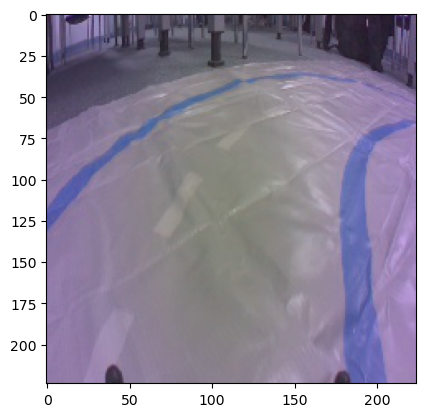

In [112]:
#Load example image
ex_name = "4_141_e50f3d56-40d4-11ed-81f8-a46bb6070c92.jpg"
ex_img = cv2.imread(read_path + ex_name)
plt.imshow(ex_img)

251_141_e50f3d56-40d4-11ed-81f8-a46bb6070c92.jpg


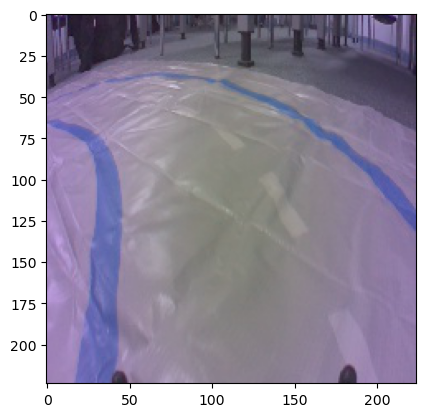

In [113]:
def flip_img(name,img):
    """Invert image on x axis"""
    
    # flip image
    img = cv2.flip(img,1)
    
    # adjust target variable
    s = name.split("_")
    s[0] = str(255 - int(s[0]))
    name = "_".join(s)
    
    return name, img


name, img = flip_img(ex_name,ex_img)
print(name)
plt.imshow(img)
    

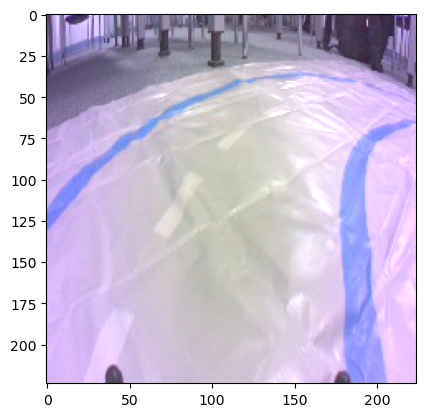

In [114]:
def adjust_brightness(img,factor=1):
    """
    Invert image on x axis
        factor: brightness level <1 will decrease and >1 will increase
    """
    
    img = Image.fromarray(img)
    enhancer = ImageEnhance.Brightness(img)
    img = enhancer.enhance(factor)

    return img


img = adjust_brightness(ex_img,factor = 1.5)
plt.imshow(img)

In [115]:
def var_target(name,x_var=5,y_var=5):
    """
    Vary the target variable
        x_var: variance for x pos 
        y_var: variance for y pos
    """
    
    s = name.split("_")
    x = int(s[0])
    y = int(s[1])
    
    # random adjustment
    x_adj = random.randint(-x_var,x_var)
    y_adj = random.randint(-y_var,y_var)
    
    #adjust x
    new_x = x + x_adj
    new_x = max(0,new_x)
    new_x = min(255,new_x)
    
    #adjust y
    new_y = y + y_adj
    new_y = max(0,new_y)
    new_y = min(255,new_y)
    
    #update name
    s[0] = str(new_x)
    s[1] = str(new_y)
    name = "_".join(s)
    
    return name

print(var_target("100_100_img.png"))
print(var_target("0_0_img.png"))
print(var_target("255_255_img.png"))


98_103_img.png
2_1_img.png
255_255_img.png


In [116]:
def rand_str(name):
    """
    Append random integers to image name
    """
    
    s = name.split(".")
    rint = random.randint(0,10000000)
    
    
    name = "{}{}.{}".format(s[0],rint,s[1])
    
    return name

print(rand_str("100_100_img.png"))
print(rand_str("0_0_img.png"))

100_100_img828627.png
0_0_img1380388.png


In [117]:
def all_together_now(name,img):
    """
    Use above fuctions to augment image
    """
    name0 = name
    img0 = img
    
    # flip image
    name1, img1 = flip_img(name0,img0)
    cv2.imwrite(write_path+name1,img1) 
    
    # brightness
    img_arr = [img0,img1]
    name_arr = [name0,name1]
    
    for img,name in zip([img0,img1],[name0,name1]):
        
        #increase brightness
        img_inc = adjust_brightness(img,factor = 1.2)
        img_inc = np.array(img_inc)
        name_inc = rand_str(name)
        
        cv2.imwrite(write_path+name_inc,img_inc) 
        img_arr.append(img_inc)
        name_arr.append(name_inc)
        
        #decrease brightness
        img_dec = adjust_brightness(img,factor = 0.8)
        img_dec = np.array(img_dec)
        name_dec = rand_str(name)
        
        cv2.imwrite(write_path+name_dec,img_dec)
        img_arr.append(img_dec)
        name_arr.append(name_dec)
        
    # Target variable 
    
    n = 2 #number of times target is varied
    for i in range(n):
        for img,name in zip(img_arr,name_arr): 
            name = var_target(name)
            cv2.imwrite(write_path+name,img) 
    

img_arr = all_together_now(ex_name,ex_img)    